In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

import glob
import pickle

import warnings
warnings.filterwarnings('ignore')

# Cross Validation

In [2]:
import time
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

In [3]:
with open('df_anal2.pickle', 'rb') as f:
    df_anal2 = pickle.load(f)

## anal 2

In [4]:
X = df_anal2.iloc[:,:-1]
y = df_anal2.iloc[:,-1]

In [5]:
skf = StratifiedShuffleSplit(n_splits=10, test_size=0.33, random_state=42)

In [6]:
lst_results = []

i = 1
for train_idx, test_idx in skf.split(X,y):
    X_train = df_anal2.iloc[train_idx, :-1]
    X_test = df_anal2.iloc[test_idx, :-1]
    y_train = df_anal2.iloc[train_idx, -1]
    y_test = df_anal2.iloc[test_idx, -1]
    
    idx1 = list(X_train.index)
    idx2 = list(X_test.index)
    
    # 1. Random Forest
    clf = RandomForestClassifier(n_estimators=1000)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    with open(f'clf_rf{i}_anal.pickle_auc_', 'wb') as f:
        pickle.dump(clf, f)
    
    pred = clf.predict(X_test)
    pred_proba = clf.predict_proba(X_test)    
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)   
    recall = recall_score(y_test, pred)    
    f1_score_ = f1_score(y_test, pred)    
    roc_auc = roc_auc_score(y_test, pred_proba[:,1])    
    lst_results.append([i, 'Random Forest', idx1, idx2, accuracy, precision, recall, f1_score_, roc_auc, training_time])
    print("Random Forest_{}".format(i))

    # 2. GradientBoosting
    clf = GradientBoostingClassifier(n_estimators=1000)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    with open(f'clf_gb{i}_anal.pickle_auc_', 'wb') as f:
        pickle.dump(clf, f)
    
    pred = clf.predict(X_test)
    pred_proba = clf.predict_proba(X_test)    
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)   
    recall = recall_score(y_test, pred)    
    f1_score_ = f1_score(y_test, pred)    
    roc_auc = roc_auc_score(y_test, pred_proba[:,1])    
    lst_results.append([i, 'GradientBoosting', idx1, idx2, accuracy, precision, recall, f1_score_, roc_auc, training_time])
    print("GradientBoosting_{}".format(i))
    
    # 3. XGBoost
    clf = XGBClassifier(n_estimators=1000)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    with open(f'clf_xgb{i}_anal.pickle_auc_', 'wb') as f:
        pickle.dump(clf, f)
    
    pred = clf.predict(X_test)
    pred_proba = clf.predict_proba(X_test)    
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)   
    recall = recall_score(y_test, pred)    
    f1_score_ = f1_score(y_test, pred)    
    roc_auc = roc_auc_score(y_test, pred_proba[:,1])    
    lst_results.append([i, 'XGBoost', idx1, idx2, accuracy, precision, recall, f1_score_, roc_auc, training_time])
    print("XGBoost_{}".format(i))
    
    # 4. LightGBM
    clf = LGBMClassifier(n_estimators=1000)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    with open(f'clf_lgb{i}_anal.pickle_auc_', 'wb') as f:
        pickle.dump(clf, f)
    
    pred = clf.predict(X_test)
    pred_proba = clf.predict_proba(X_test)    
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)   
    recall = recall_score(y_test, pred)    
    f1_score_ = f1_score(y_test, pred)    
    roc_auc = roc_auc_score(y_test, pred_proba[:,1])    
    lst_results.append([i, 'LightGBM', idx1, idx2, accuracy, precision, recall, f1_score_, roc_auc, training_time])
    print("LightGBM_{}".format(i))
    
    # 5. CatBoost
    clf = CatBoostClassifier()
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    with open(f'clf_cb{i}_anal.pickle_auc_', 'wb') as f:
        pickle.dump(clf, f)
    
    pred = clf.predict(X_test)
    pred_proba = clf.predict_proba(X_test)    
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)   
    recall = recall_score(y_test, pred)    
    f1_score_ = f1_score(y_test, pred)    
    roc_auc = roc_auc_score(y_test, pred_proba[:,1])    
    lst_results.append([i, 'CatBoost', idx1, idx2, accuracy, precision, recall, f1_score_, roc_auc, training_time])
    print("CatBoost_{}".format(i))
    
    i+=1

Random Forest_1
GradientBoosting_1
[20:44:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost_1
LightGBM_1
Learning rate set to 0.041843
0:	learn: 0.6840793	total: 64.7ms	remaining: 1m 4s
1:	learn: 0.6765635	total: 80ms	remaining: 39.9s
2:	learn: 0.6695248	total: 93.5ms	remaining: 31.1s
3:	learn: 0.6624043	total: 108ms	remaining: 26.9s
4:	learn: 0.6561779	total: 122ms	remaining: 24.3s
5:	learn: 0.6498930	total: 137ms	remaining: 22.7s
6:	learn: 0.6441611	total: 152ms	remaining: 21.5s
7:	learn: 0.6389683	total: 166ms	remaining: 20.6s
8:	learn: 0.6338624	total: 180ms	remaining: 19.8s
9:	learn: 0.6292742	total: 193ms	remaining: 19.2s
10:	learn: 0.6255457	total: 207ms	remaining: 18.6s
11:	learn: 0.6216670	total: 221ms	remaining: 18.2s
12:	learn: 0.6178653	total: 235ms	remaining: 17.9s
13:	lear

In [7]:
df_results = pd.DataFrame(data=lst_results, columns=['iter', 'method', 'train_idx', 'test_idx', 'accuracy', 
                                                     'precision', 'recall', 'f1_score', 'roc_auc', 'training_time'])

In [8]:
df_results

,iter,method,train_idx,test_idx,accuracy,precision,recall,f1_score,roc_auc,training_time
0,1,Random Forest,"[21598, 31231, 27232, 10243, 6852, 2056, 33959...","[34171, 180, 3823, 782, 11260, 17938, 2107, 41...",0.717704,0.720130,0.961615,0.823535,0.706843,88.317015
1,1,GradientBoosting,"[21598, 31231, 27232, 10243, 6852, 2056, 33959...","[34171, 180, 3823, 782, 11260, 17938, 2107, 41...",0.721134,0.745689,0.899755,0.815510,0.723070,368.283956
2,1,XGBoost,"[21598, 31231, 27232, 10243, 6852, 2056, 33959...","[34171, 180, 3823, 782, 11260, 17938, 2107, 41...",0.711912,0.747012,0.876168,0.806452,0.697620,17.899960
3,1,LightGBM,"[21598, 31231, 27232, 10243, 6852, 2056, 33959...","[34171, 180, 3823, 782, 11260, 17938, 2107, 41...",0.719838,0.745290,0.897864,0.814493,0.712155,3.943861
4,1,CatBoost,"[21598, 31231, 27232, 10243, 6852, 2056, 33959...","[34171, 180, 3823, 782, 11260, 17938, 2107, 41...",0.724106,0.739857,0.921117,0.820597,0.728141,14.580664
5,2,Random Forest,"[2077, 1421, 7515, 31778, 7813, 3581, 31900, 2...","[13068, 28127, 23670, 21554, 22221, 17803, 263...",0.711988,0.718333,0.953382,0.819334,0.692745,91.609341
6,2,GradientBoosting,"[2077, 1421, 7515, 31778, 7813, 3581, 31900, 2...","[13068, 28127, 23670, 21554, 22221, 17803, 263...",0.715875,0.742889,0.894971,0.811869,0.711265,369.695870
7,2,XGBoost,"[2077, 1421, 7515, 31778, 7813, 3581, 31900, 2...","[13068, 28127, 23670, 21554, 22221, 17803, 263...",0.704824,0.744106,0.867379,0.801027,0.693007,18.012856
8,2,LightGBM,"[2077, 1421, 7515, 31778, 7813, 3581, 31900, 2...","[13068, 28127, 23670, 21554, 22221, 17803, 263...",0.712598,0.741595,0.890854,0.809401,0.705072,4.189471
9,2,CatBoost,"[2077, 1421, 7515, 31778, 7813, 3581, 31900, 2...","[13068, 28127, 23670, 21554, 22221, 17803, 263...",0.721363,0.739662,0.915443,0.818218,0.717146,14.322836


In [9]:
df_results.to_csv('compare model_anal2_auc.csv', sep='\t')

# Result

## AUC

In [10]:
df_auc = pd.read_csv('compare model_anal2_auc.csv', sep='\t', index_col=0)

In [11]:
df_auc

,iter,method,train_idx,test_idx,accuracy,precision,recall,f1_score,roc_auc,training_time
0,1,Random Forest,"[21598, 31231, 27232, 10243, 6852, 2056, 33959...","[34171, 180, 3823, 782, 11260, 17938, 2107, 41...",0.717704,0.720130,0.961615,0.823535,0.706843,88.317015
1,1,GradientBoosting,"[21598, 31231, 27232, 10243, 6852, 2056, 33959...","[34171, 180, 3823, 782, 11260, 17938, 2107, 41...",0.721134,0.745689,0.899755,0.815510,0.723070,368.283956
2,1,XGBoost,"[21598, 31231, 27232, 10243, 6852, 2056, 33959...","[34171, 180, 3823, 782, 11260, 17938, 2107, 41...",0.711912,0.747012,0.876168,0.806452,0.697620,17.899960
3,1,LightGBM,"[21598, 31231, 27232, 10243, 6852, 2056, 33959...","[34171, 180, 3823, 782, 11260, 17938, 2107, 41...",0.719838,0.745290,0.897864,0.814493,0.712155,3.943861
4,1,CatBoost,"[21598, 31231, 27232, 10243, 6852, 2056, 33959...","[34171, 180, 3823, 782, 11260, 17938, 2107, 41...",0.724106,0.739857,0.921117,0.820597,0.728141,14.580664
5,2,Random Forest,"[2077, 1421, 7515, 31778, 7813, 3581, 31900, 2...","[13068, 28127, 23670, 21554, 22221, 17803, 263...",0.711988,0.718333,0.953382,0.819334,0.692745,91.609341
6,2,GradientBoosting,"[2077, 1421, 7515, 31778, 7813, 3581, 31900, 2...","[13068, 28127, 23670, 21554, 22221, 17803, 263...",0.715875,0.742889,0.894971,0.811869,0.711265,369.695870
7,2,XGBoost,"[2077, 1421, 7515, 31778, 7813, 3581, 31900, 2...","[13068, 28127, 23670, 21554, 22221, 17803, 263...",0.704824,0.744106,0.867379,0.801027,0.693007,18.012856
8,2,LightGBM,"[2077, 1421, 7515, 31778, 7813, 3581, 31900, 2...","[13068, 28127, 23670, 21554, 22221, 17803, 263...",0.712598,0.741595,0.890854,0.809401,0.705072,4.189471
9,2,CatBoost,"[2077, 1421, 7515, 31778, 7813, 3581, 31900, 2...","[13068, 28127, 23670, 21554, 22221, 17803, 263...",0.721363,0.739662,0.915443,0.818218,0.717146,14.322836


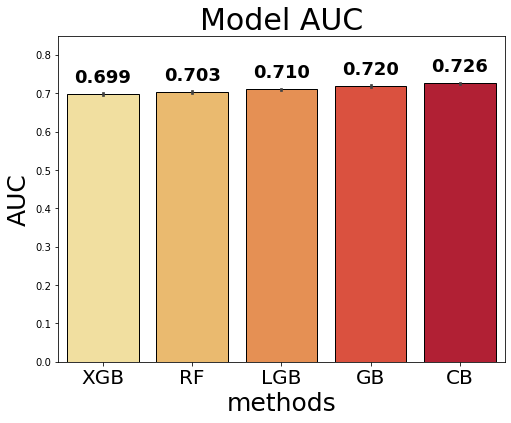

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8, 6))
plt = fig.subplots()
ax=sns.barplot(data=df_auc, x='method', y='roc_auc',
                 order=['XGBoost','Random Forest', 'LightGBM', 'GradientBoosting', 'CatBoost'],
                 edgecolor='k',palette='YlOrRd')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.03, '%.3f'% height, ha='center', size=18, fontweight='bold')
    
_=ax.set_ylim(0, 0.85)    
_=ax.set_xlabel('methods', fontsize=25)
_=ax.set_ylabel('AUC', fontsize=25)
_=ax.set_title('Model AUC', fontsize=30)
_=ax.set_xticks([0, 1, 2, 3, 4])
_=ax.set_xticklabels(['XGB','RF','LGB', 'GB', 'CB'], fontsize=20)
# _=ax.set_yticks(np.arange(0,1.1,0.1))
# _=ax.set_yticklabels(np.arange(0,1.1,0.1), fontsize=12)
